# Create a MDAnalysis universe

In [1]:
import numpy as np
import MDAnalysis as mda
import nmrformd as nmrmd

In [2]:
datapath = "./lammps-inputs/"

In [3]:
u = mda.Universe(datapath+"topology.data", datapath+"traj.xtc")

In [4]:
n_molecules = u.atoms.n_residues
print(f"The number of water molecules is {n_molecules}")

The number of water molecules is 300


In [5]:
timestep = np.int32(u.trajectory.dt)
print(f"The timestep is {timestep} ps")

The timestep is 1 ps


In [6]:
total_time = np.int32(u.trajectory.totaltime)
print(f"The total simulation time is {total_time} ps")

The total simulation time is 1000 ps


# Run NMRforMD

In [7]:
group_i = u.select_atoms("type 2")

In [8]:
nmr_result = nmrmd.NMR(u, group_i, number_i=50)

# Extract results

In [9]:
T1 = np.round(nmr_result.T1,2)
print(f"NMR relaxation time T1 = {T1} s")

NMR relaxation time T1 = 1.94 s


#### Plot the spectrum

Note: here, one figure is made for the light mode of the documentation, the other one for the dark mode

In [10]:
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [11]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fontsize = 30
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblue = [0/ 255, 150/255, 177/ 255]
lightgray = [0.1, 0.1, 0.1]
darkgray = [0.9, 0.9, 0.9]
myred= [255/ 255, 77/255, 77/ 255]

In [62]:
def figure_improvement(fig, ax1, mygray, xlabel=None, ylabel=None, xlim=None, ylim=None):

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    ax1.minorticks_on()
    ax1.tick_params('both', length=10, width=2, which='major', direction='in')
    ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
    ax1.xaxis.set_ticks_position('both')
    ax1.yaxis.set_ticks_position('both')
    ax1.spines["top"].set_linewidth(2)
    ax1.spines["bottom"].set_linewidth(2)
    ax1.spines["left"].set_linewidth(2)
    ax1.spines["right"].set_linewidth(2)

    ax1.xaxis.label.set_color(mygray)
    ax1.yaxis.label.set_color(mygray)
    ax1.tick_params(axis='x', colors=mygray)
    ax1.tick_params(axis='y', colors=mygray)
    ax1.spines['left'].set_color(mygray)
    ax1.spines['top'].set_color(mygray)
    ax1.spines['bottom'].set_color(mygray)
    ax1.spines['right'].set_color(mygray)
    ax1.tick_params(axis='y', which='both', colors=mygray)
    ax1.tick_params(axis='x', which='both', colors=mygray)
    ax1.tick_params(axis='x', pad=10)

    ax1.legend(frameon=False, fontsize=fontsize, 
            loc='best', handletextpad=0.5,
            handlelength = 0.2, borderpad = 0.3, 
            labelspacing=0.3) 

    if xlabel is not None:
        ax1.set_xlabel(xlabel, fontdict=font, color=mygray)
    if ylabel is not None:
        ax1.set_ylabel(ylabel, fontdict=font, color=mygray)
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    #ax1.set_xticks([0, 5, 10, 15, 20])
    #ax1.set_yticks([0, 0.4, 0.8, 1.2, 1.6])
    #minor_locator_y = AutoMinorLocator(2)
    #ax1.yaxis.set_minor_locator(minor_locator_y)
    #minor_locator_x = AutoMinorLocator(2)
    #ax1.xaxis.set_minor_locator(minor_locator_x)

In [63]:
def save_figure(plt, fig, mode, name):
    fig.tight_layout()        
    if mode == 'light':
        file = "figures/" + name + "-light.png"
    else:
        file = "figures/" + name + "-dark.png"
    plt.savefig(file, bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
    plt.show()    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


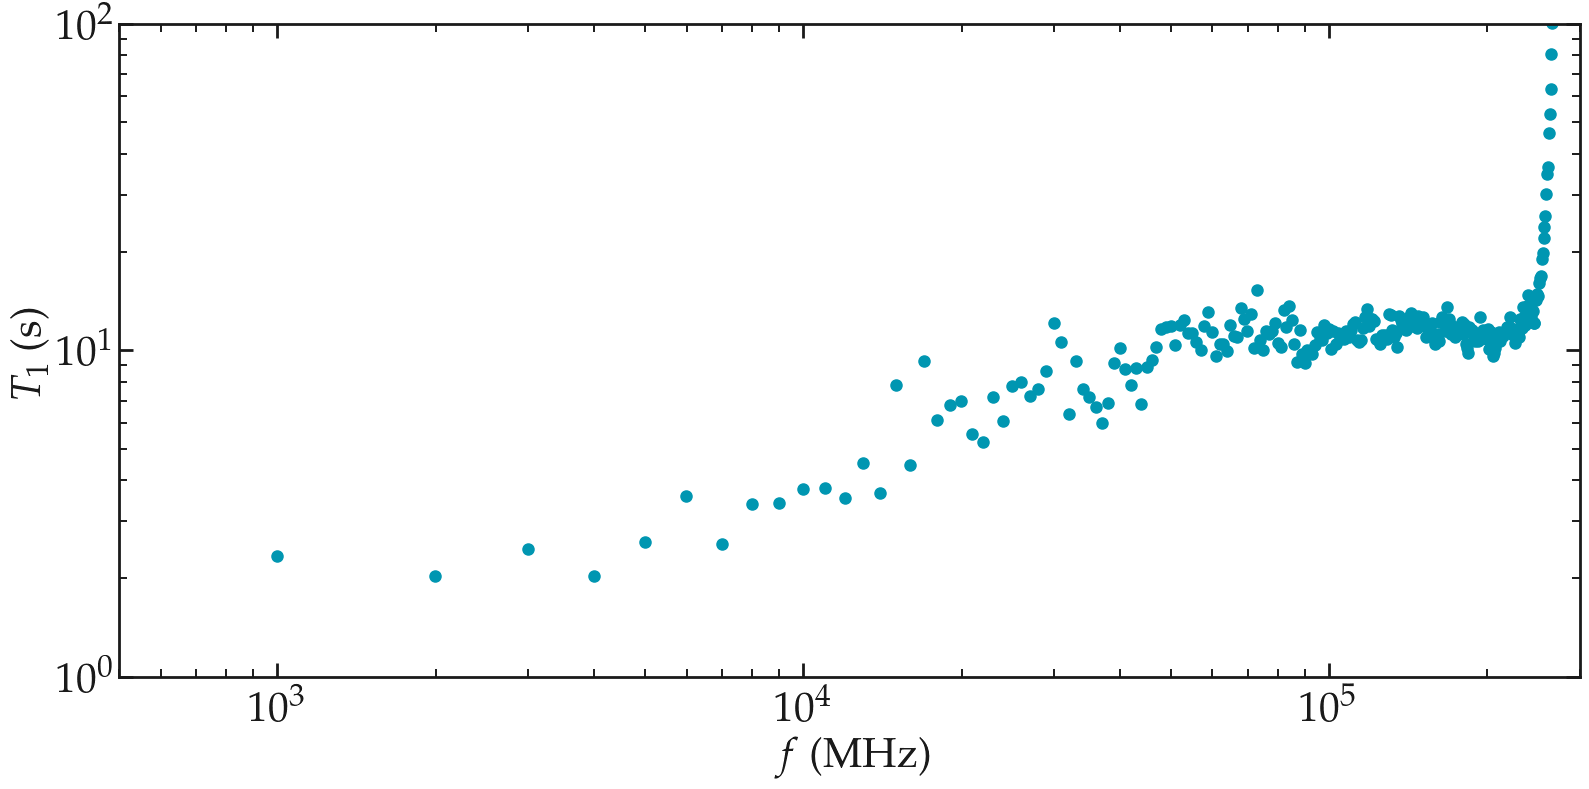

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


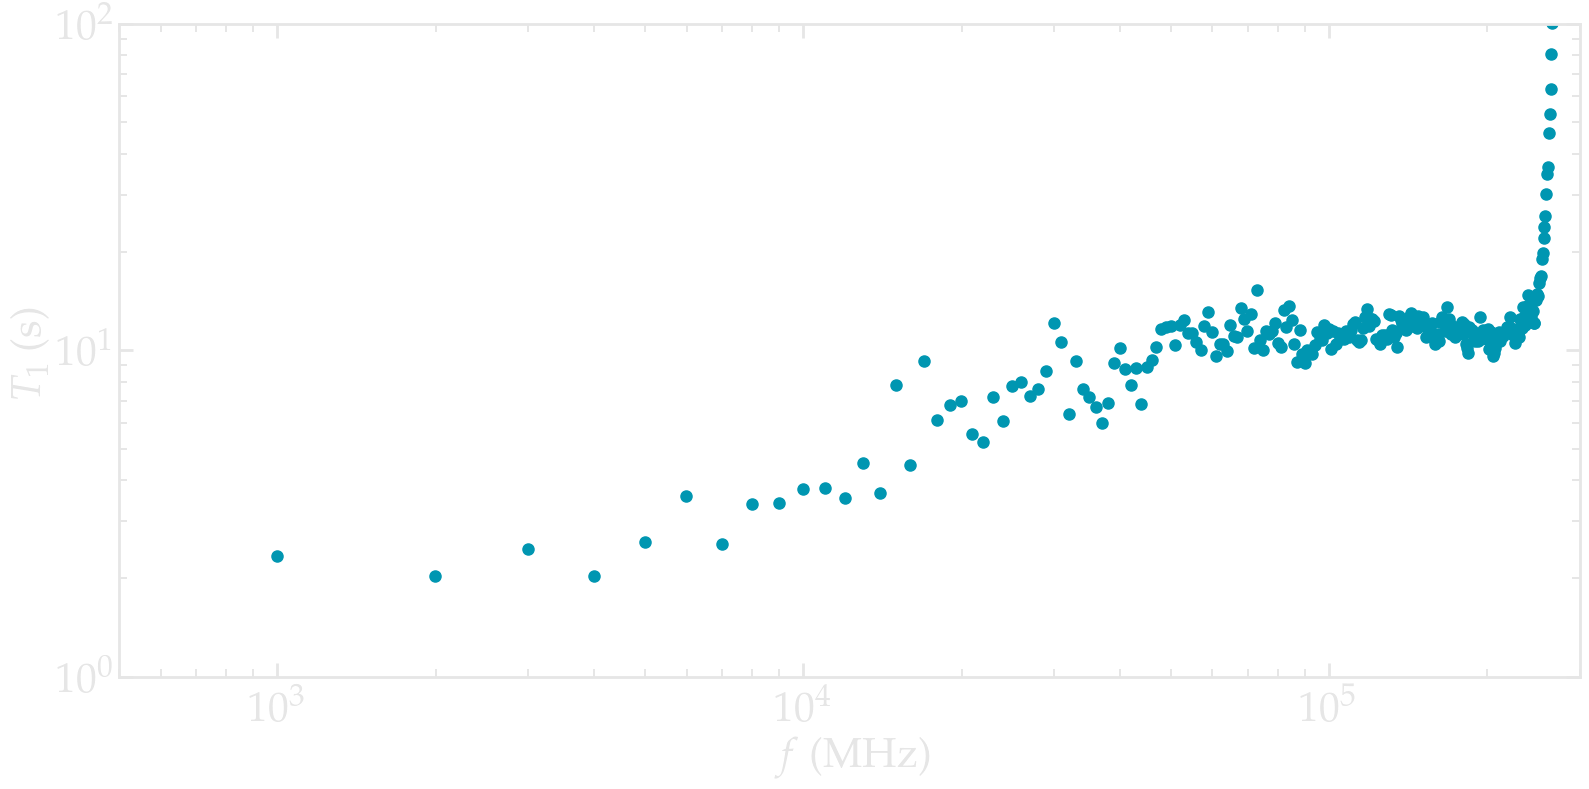

In [71]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(nmr_result.f[:-60], 1/nmr_result.R1[:-60], 'o', markersize=8, color=myblue)
    figure_improvement(fig, ax1, mygray,
                       xlabel=r"$f$ (MHz)", ylabel=r'$T_1$ (s)',
                       xlim=(5e2, 3e5), ylim=(1, 100))
    save_figure(plt, fig, mode, name='T1')

# Plot the correlation function

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


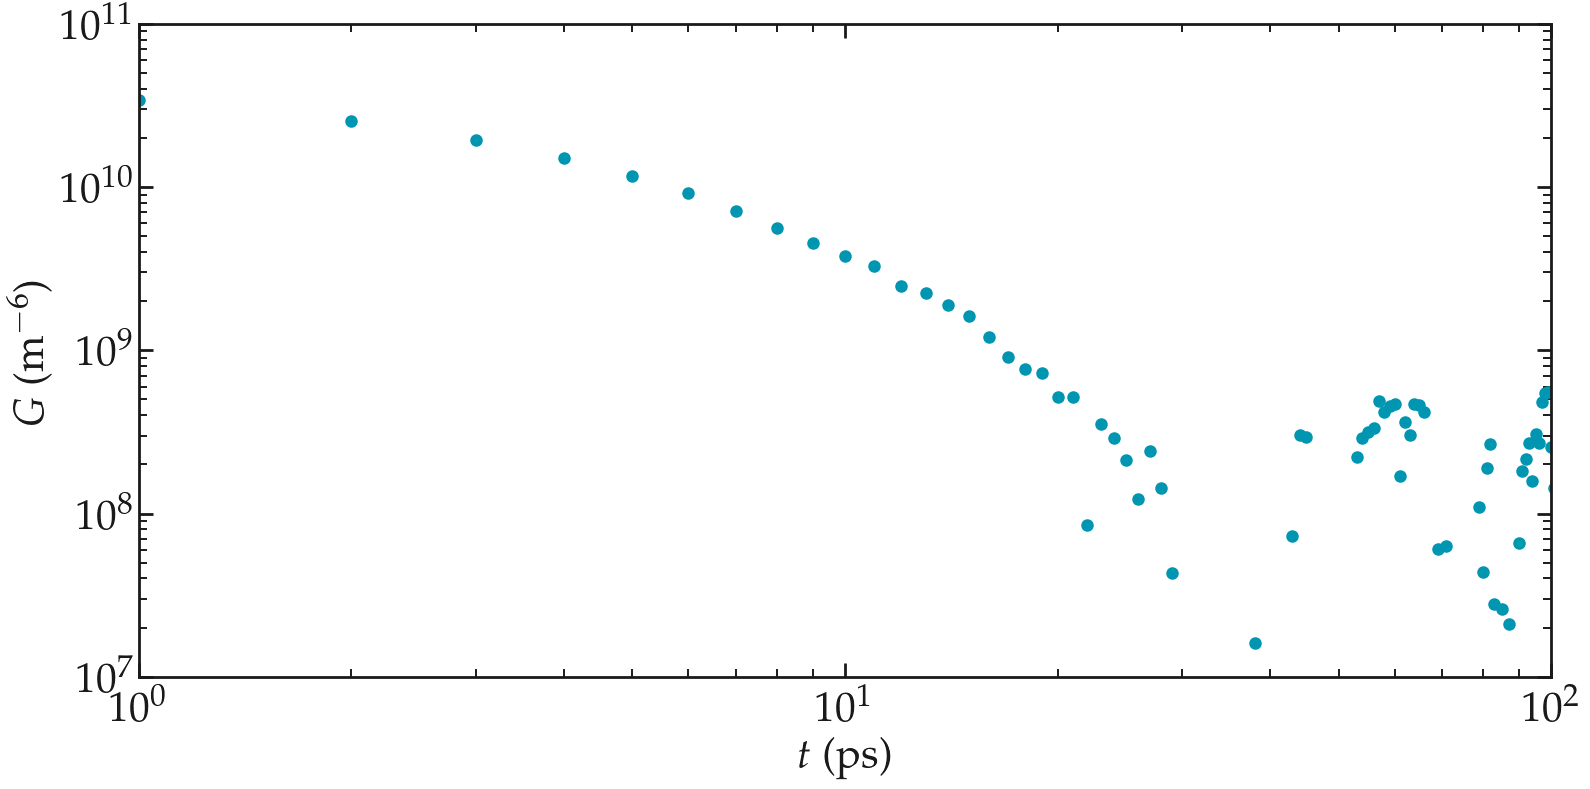

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


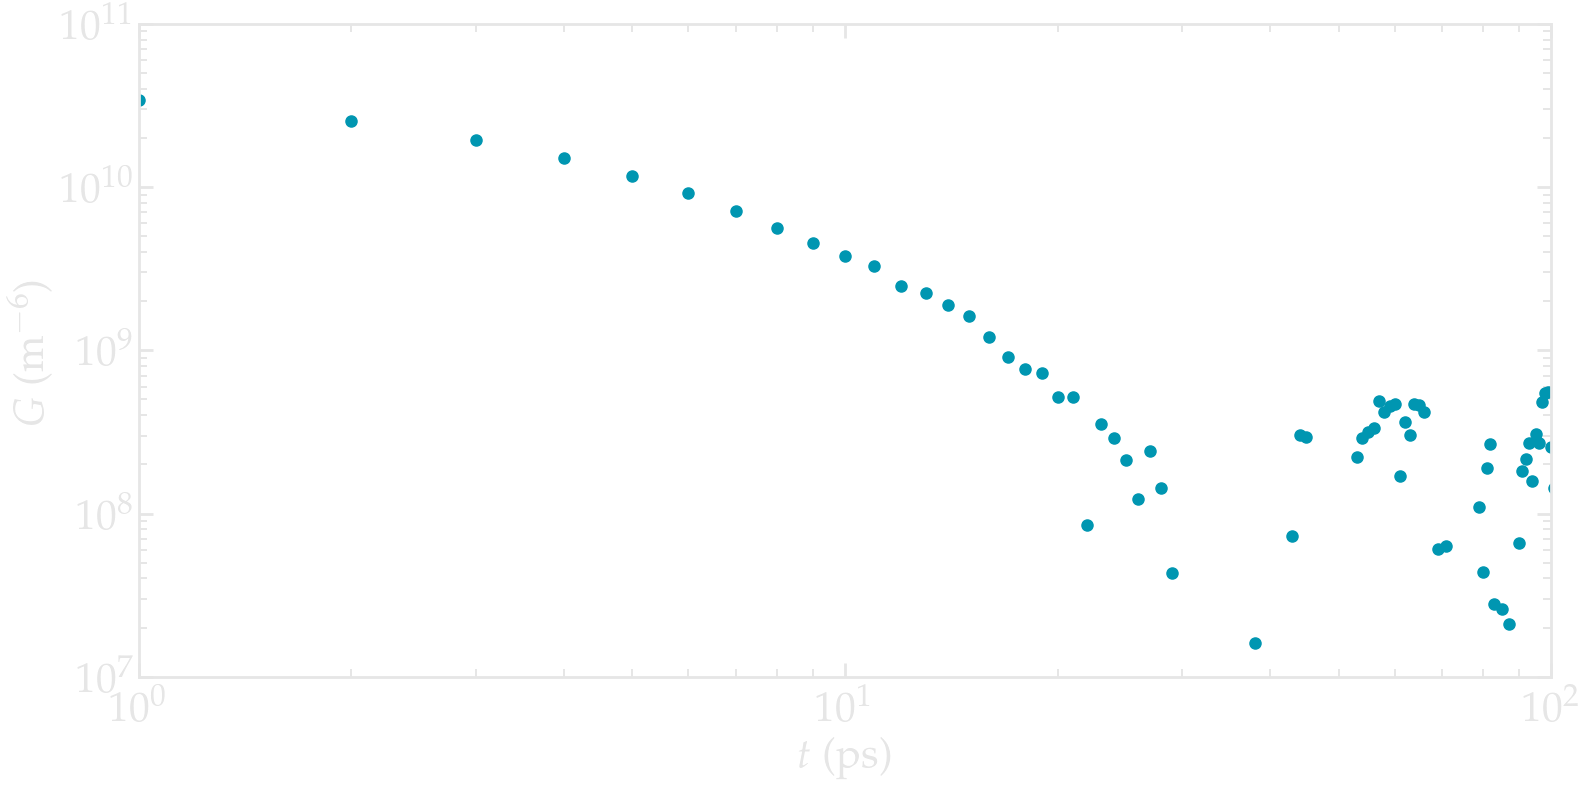

In [65]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(nmr_result.t[:-20], nmr_result.gij[0][:-20], 'o', markersize=8, color=myblue)
    figure_improvement(fig, ax1, mygray,
                       xlabel=r"$t$ (ps)", ylabel=r'$G$ (m$^{-6}$)',
                       xlim=(1, 100), ylim=(1e7, 1e11))
    save_figure(plt, fig, mode, name='Gij')

# Intra/Inter motion

In [60]:
nmr_result_intra = nmrmd.NMR(u, group_i, type_analysis="intra_molecular", number_i=0)
nmr_result_inter = nmrmd.NMR(u, group_i, type_analysis="inter_molecular", number_i=20)

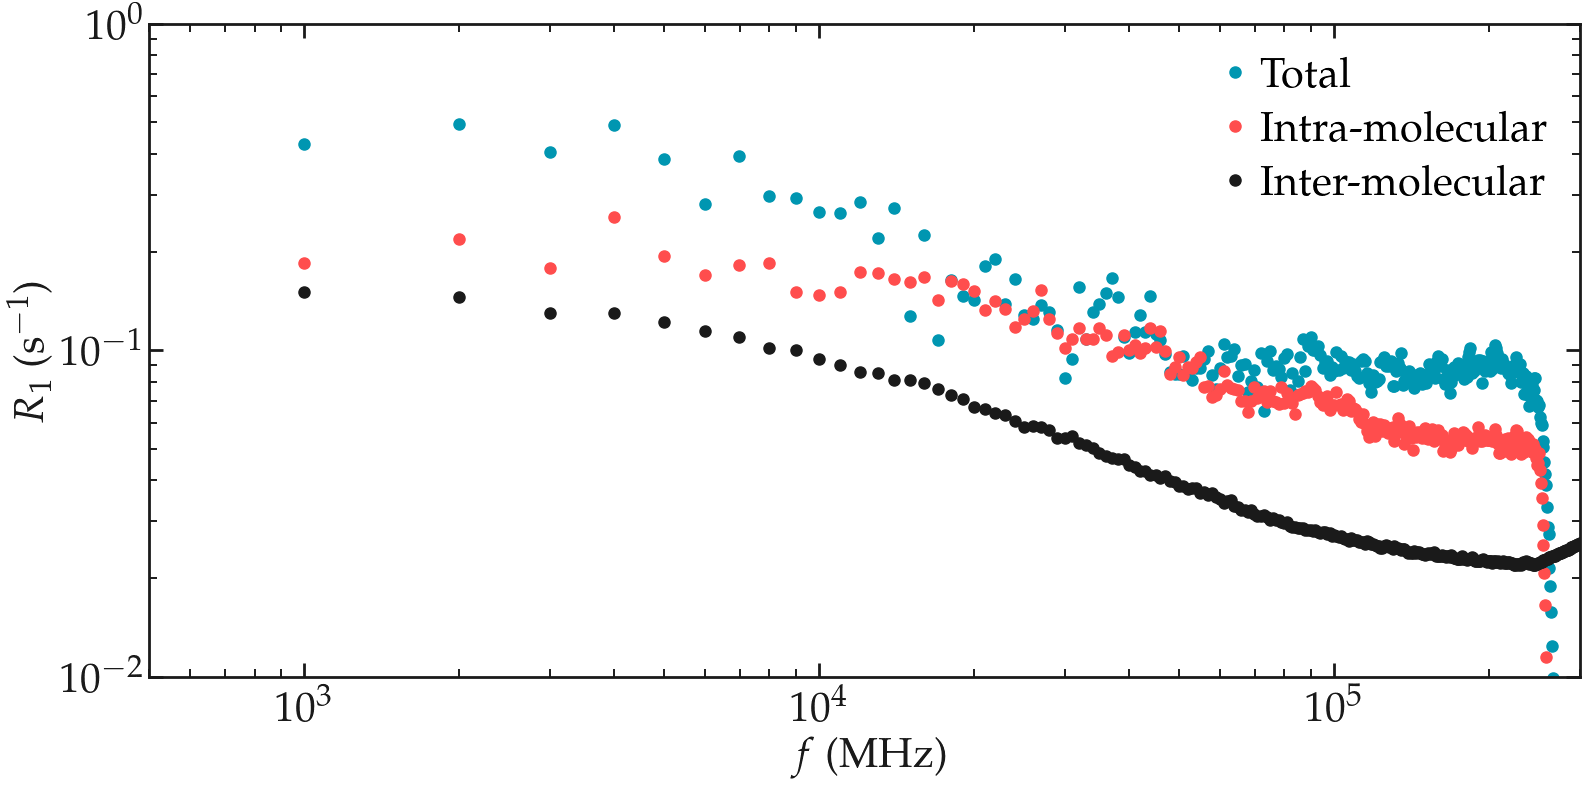

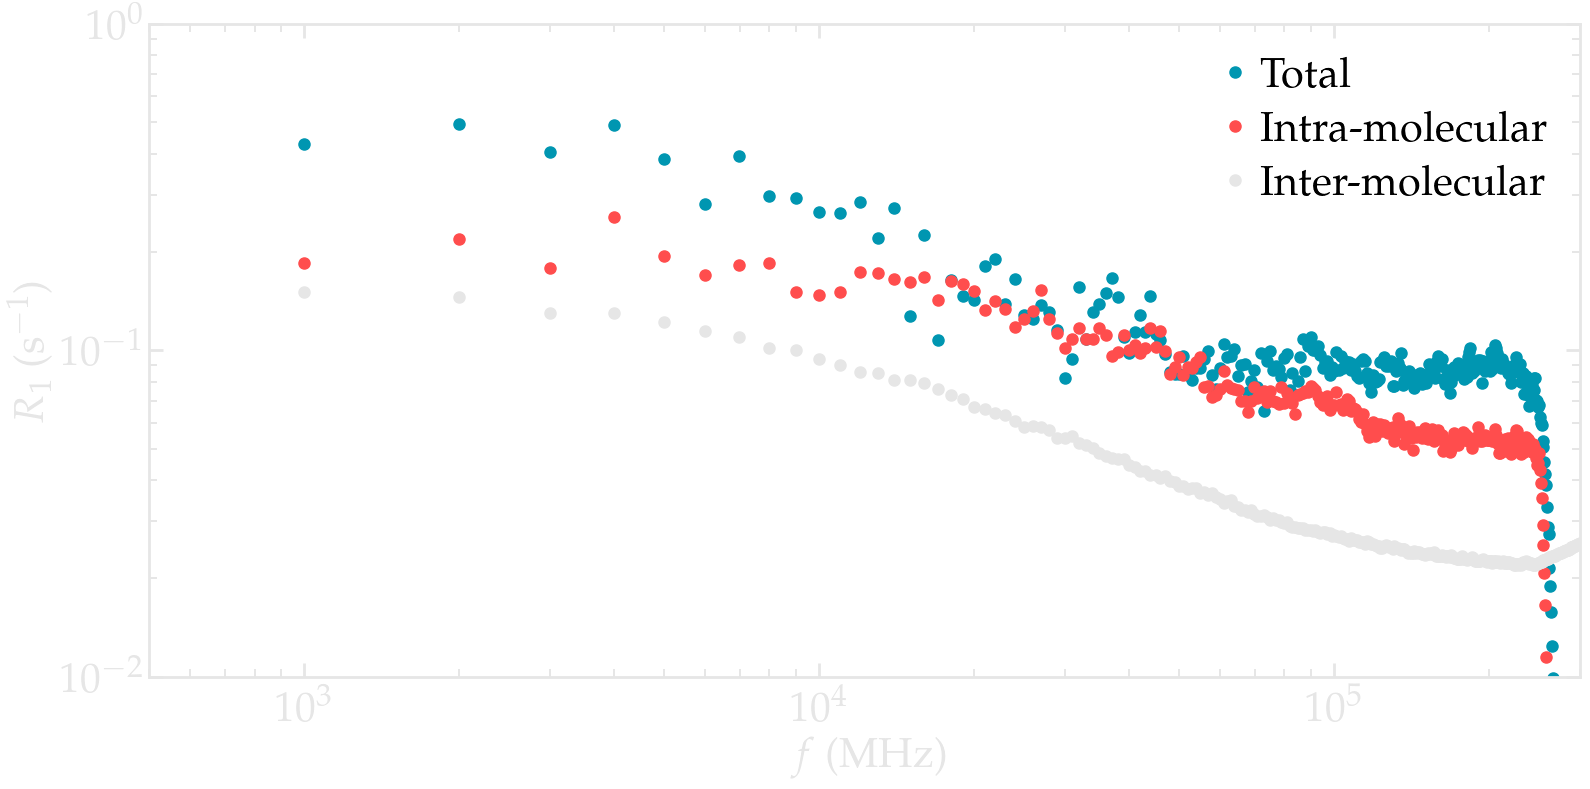

In [70]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(nmr_result.f[:-60], nmr_result.R1[:-60], 'o', markersize=8, color=myblue, label="Total")
    ax1.loglog(nmr_result_intra.f[:-60], nmr_result_intra.R1[:-60], 'o', markersize=8, color=myred, label="Intra-molecular")
    ax1.loglog(nmr_result_inter.f[:-60], nmr_result_inter.R1[:-60], 'o', markersize=8, color=mygray, label="Inter-molecular")
    figure_improvement(fig, ax1, mygray,
                       xlabel=r"$f$ (MHz)", ylabel=r'$R_1$ (s$^{-1}$)',
                       xlim=(5e2, 3e5), ylim=(0.01, 1))
    save_figure(plt, fig, mode, name='R1-intra-inter')

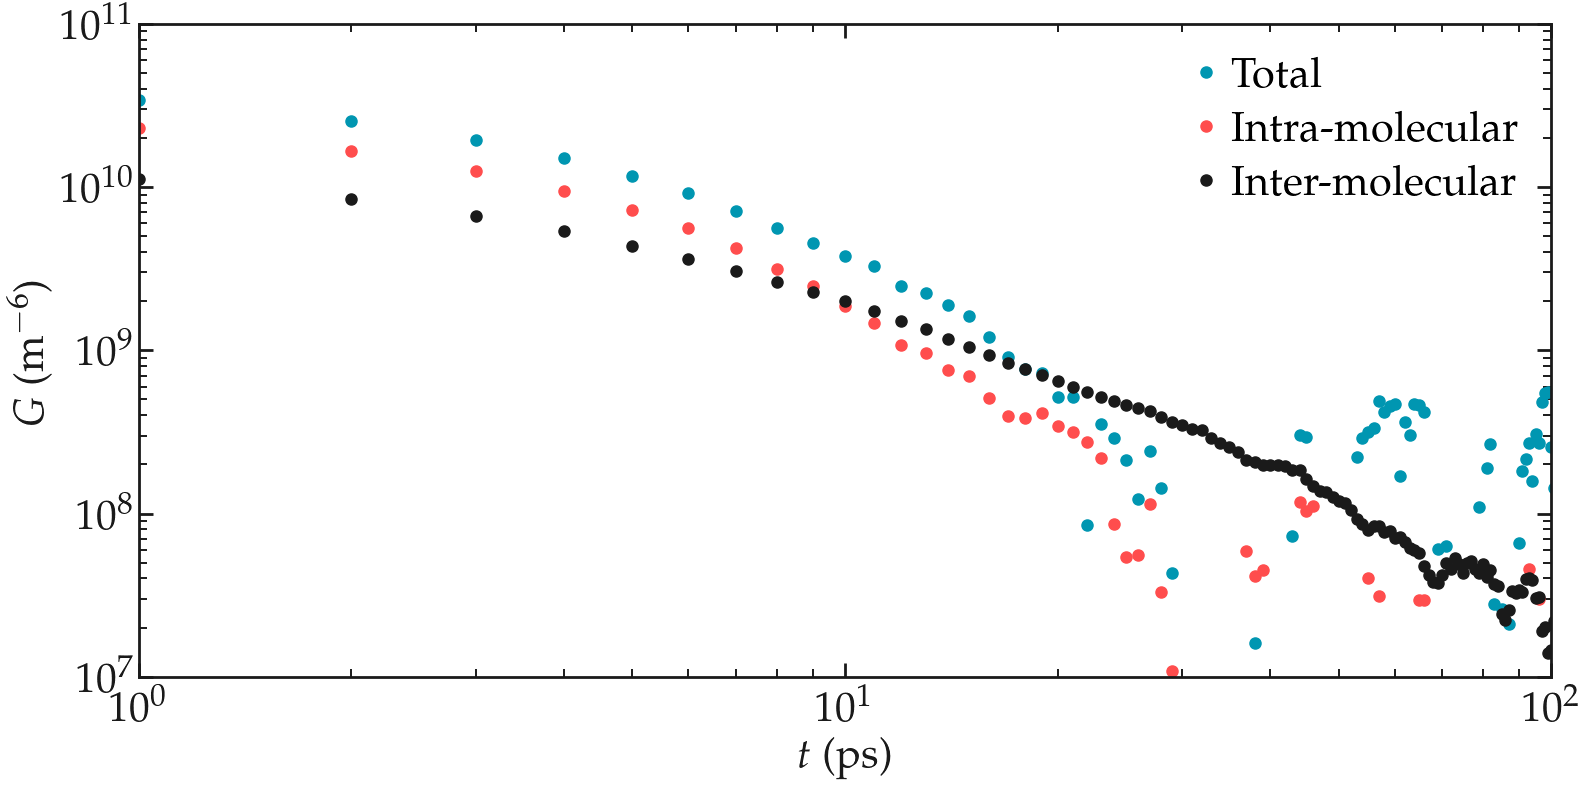

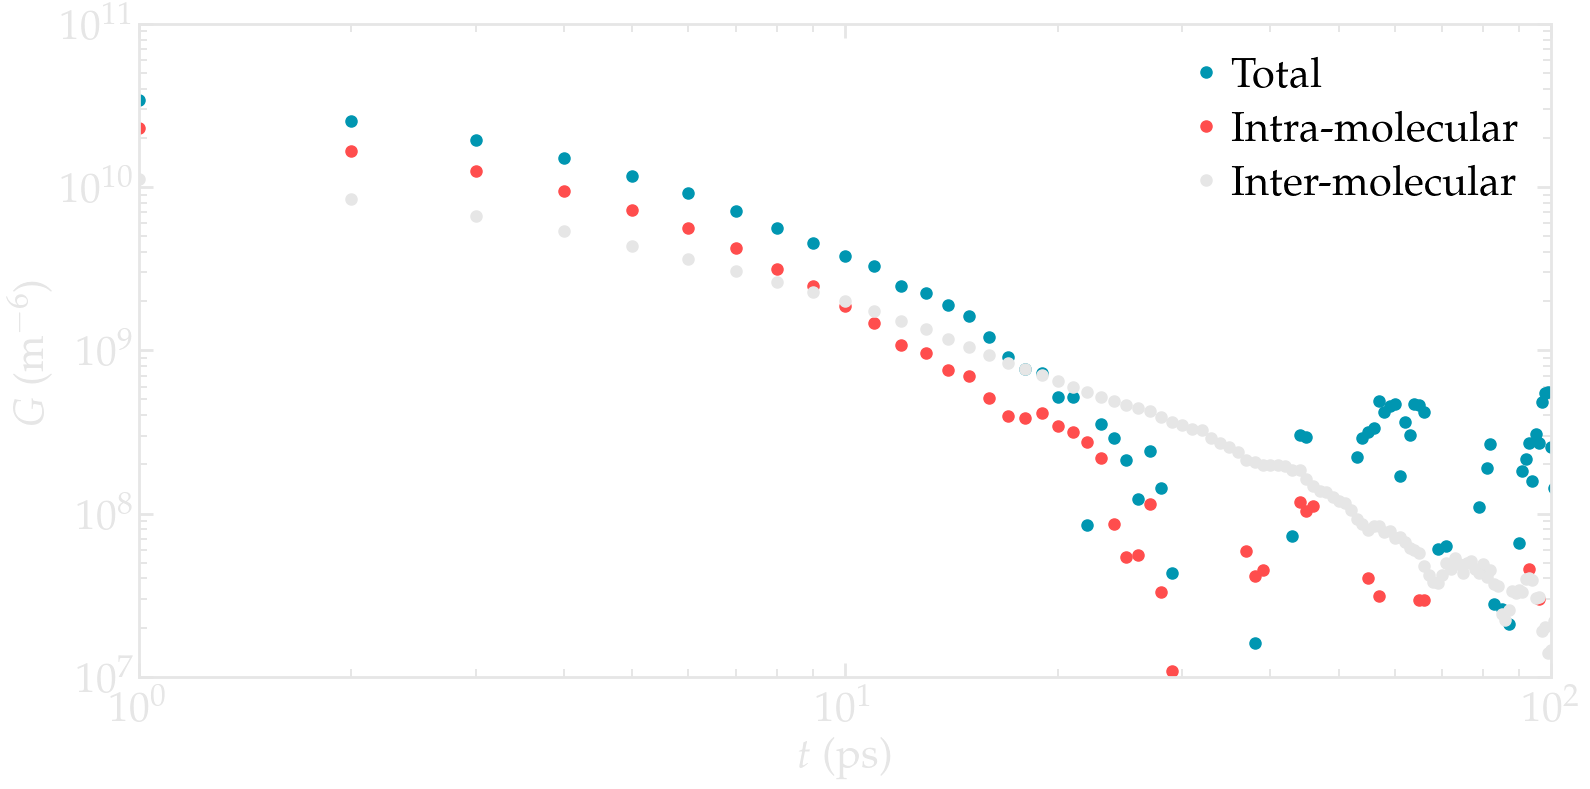

In [78]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(nmr_result.t, nmr_result.gij[0], 'o', markersize=8, color=myblue, label="Total")
    ax1.loglog(nmr_result_intra.t, nmr_result_intra.gij[0], 'o', markersize=8, color=myred, label="Intra-molecular")
    ax1.loglog(nmr_result_inter.t, nmr_result_inter.gij[0], 'o', markersize=8, color=mygray, label="Inter-molecular")
    figure_improvement(fig, ax1, mygray,
                       xlabel=r"$t$ (ps)", ylabel=r'$G$ (m$^{-6}$)',
                       xlim=(1, 100), ylim=(1e7, 1e11))
    save_figure(plt, fig, mode, name='Gij')